### Fashion MNIST Classification with RNNs (25 points)


We can classify the fashion MNIST dataset using LSTM RNNs by looking at each row of the image. The image is 28 pixels by 28 pixels in the dataset. This means that the RNN first looks at the first row at X_0 and then reviews the row at index X_i working its way up to the 28th row of pixels. The RNN LSTM memory is the weights vector that is fed into each of the following states. This helps remembers the previous rows data and feeds into the upcoming state. 
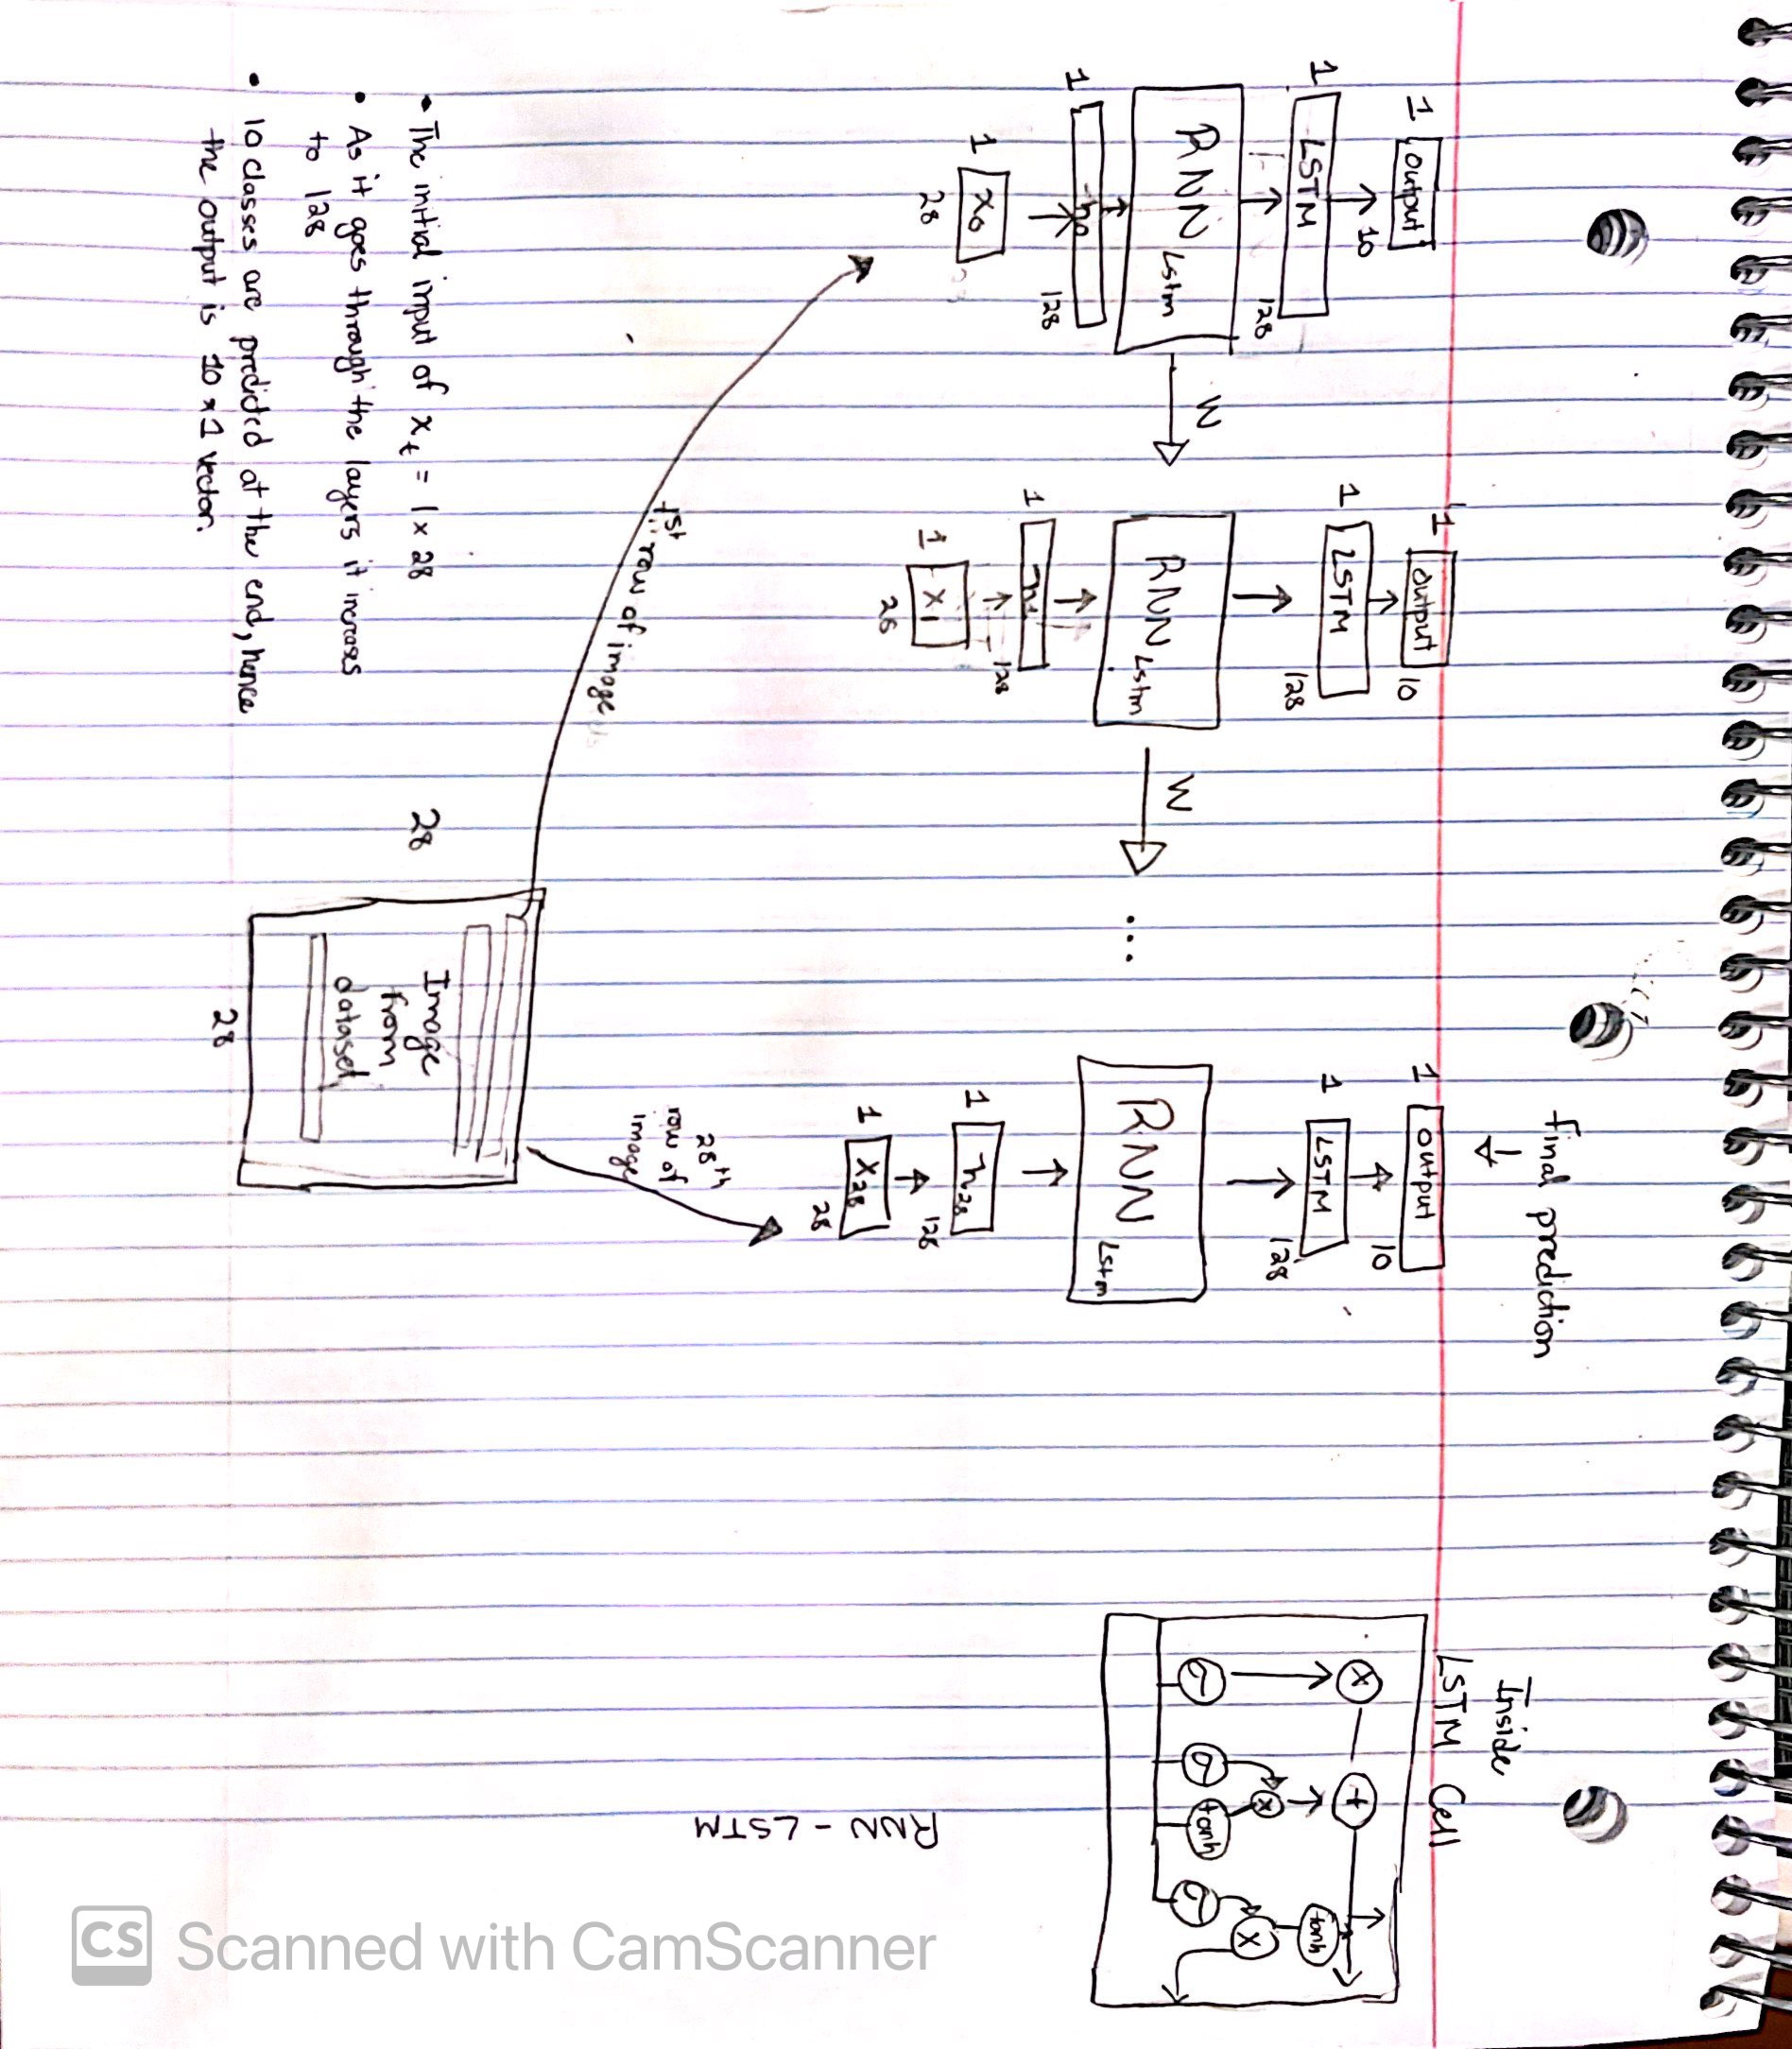

### CNN Implementation

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


In [ ]:
import pandas as pd
import numpy as np
from numpy import array
from numpy import argmax
from keras.layers.core import Dense, Activation, Dropout
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:

print(train_labels)

[9 0 0 ... 3 0 5]


In [ ]:
print(len(train_labels))
print(train_images.shape)
print(test_images.shape)
print(len(test_labels))

#shape of each image is 28 x 28 pixels

60000
(60000, 28, 28)
(10000, 28, 28)
10000


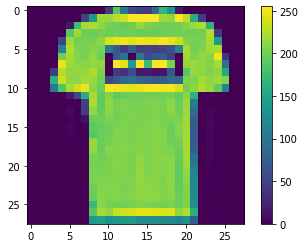

In [ ]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.4927 - accuracy: 0.8190
Epoch 2/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.3195 - accuracy: 0.8820
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2749 - accuracy: 0.8986
Epoch 4/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.2439 - accuracy: 0.9086
Epoch 5/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2205 - accuracy: 0.9181
Epoch 6/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2013 - accuracy: 0.9251
Epoch 7/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1803 - accuracy: 0.9331
Epoch 8/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1664 - accuracy: 0.9383
Epoch 9/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1552 - accuracy: 0.9420
Epoch 10/10
1875/1875 [==============================] - 58s 31m

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 3s - loss: 0.2709 - accuracy: 0.9111 - 3s/epoch - 9ms/step

Test accuracy: 0.9110999703407288


### RNN LSTM Implementation

In [ ]:
train_images.shape[1:]

(28, 28)

In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(28,28), activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 116s 61ms/step - loss: 0.6623 - accuracy: 0.7513
Epoch 2/10
1875/1875 [==============================] - 115s 61ms/step - loss: 0.4308 - accuracy: 0.8419
Epoch 3/10
1875/1875 [==============================] - 115s 62ms/step - loss: 0.3727 - accuracy: 0.8614
Epoch 4/10
1875/1875 [==============================] - 115s 61ms/step - loss: 0.3467 - accuracy: 0.8718
Epoch 5/10
1875/1875 [==============================] - 115s 61ms/step - loss: 0.3168 - accuracy: 0.8827
Epoch 6/10
1875/1875 [==============================] - 116s 62ms/step - loss: 0.2993 - accuracy: 0.8890
Epoch 7/10
1875/1875 [==============================] - 116s 62ms/step - loss: 0.2851 - accuracy: 0.8933
Epoch 8/10
1875/1875 [==============================] - 115s 61ms/step - loss: 0.2707 - accuracy: 0.8996
Epoch 9/10
1875/1875 [==============================] - 116s 62ms/step - loss: 0.2592 - accuracy: 0.9034
Epoch 10/10
1875/1875 [==============================] - 115s 62ms

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 - 6s - loss: 0.3002 - accuracy: 0.8906 - 6s/epoch - 19ms/step

Test accuracy: 0.8906000256538391


### Performance Comparison (25 points)

The accuracy of the training for CNNs was higher than the training accuracy of the LSTM RNN. The test accuracy for CNN was also much higher than the one for RNN for the same epochs. CNNs seem to perform much better much quicker. To get the test accuracy of CNN model took around half the time of training for 10 epochs than the LSTM RNN model. To get the accuracy of the RNN after 10 epochs only took the CNN 3-4 epochs. This shows that CNNs are much faster than RNNs and achieve better performance much quicker.

For the CNN implementation 90% average accuracy was reached between the 3rd and 4th epoch. To achieve this same accuracy it took the RNN LSTM implementation 10 epochs. RNNs also took 2x as much time as CNNs to run for each epoch. This resulted in RNNs taking 5x more time than CNNs to get to the same accuracy. It took RNNs approximately 800 seconds and CNNs approximately 160 seconds to reach the accuracy of around 90%.

Overall, CNNs perform much better with images as they are much faster and acheive higher accuracy faster than RNNs.

### CNN + RNN (25 points)

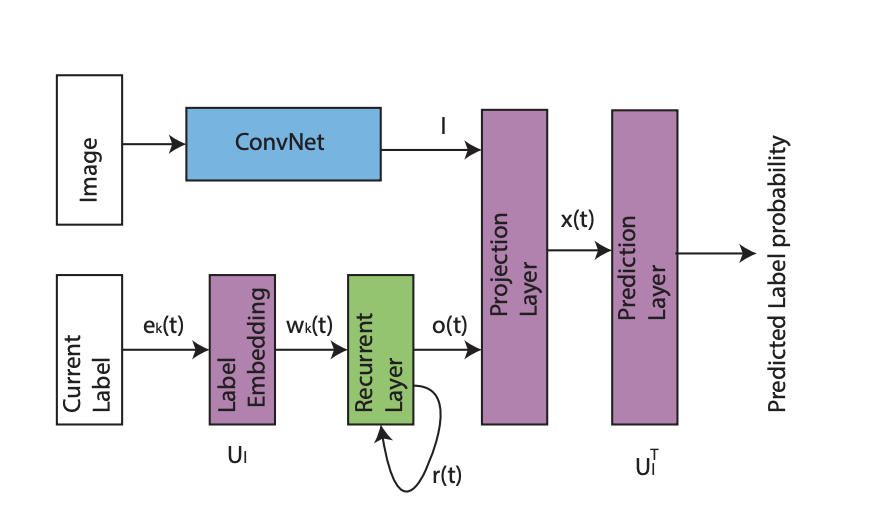



This is the diagram that shows how CNNs and RNNs can be combined together and used. The CNN component extracts the semantic representations from the images and the RNN component models the image and label relationship. In the diagram above according to the research paper, the convolutional neural network is used as the image representation while the recurrent layer captures the
information of the previously predicted labels. The output label
probability is calculated based on the CNN image representation and
the RNN output of the recurrent layer. 

This becomes useful in multilabel classification such as an image with a boat, water and the sky. Using the CNN-RNN structure would allow the CNN to focus on the non-main components of the image. Usually, these smaller details such as the sky and water would be hard to identify but the RNNs would help decode the label dependencies and receive context from the the CNN regarding the other features. First the image goes to through the CNN architecture then its output gets combined with the RNN output to get the final prediction. In our case, since we are only dealing with a singular item in each image we can use the CNN or RNN individually and get good performance. But for a more complex picture such as one with water, boat, and sky the CNN-RNN model would give much higher accuracy. 


According to the paper, the combined CNN-RNN model is good for label captioning and multi image classification. For example, one great place where the CNN and RNN structure could benefit us is in the captioning of a video. In this example, the video of a person driving a boat. A video is composed of several frames of images put together and the CNN would be able to identify different objects such as the water, the sky, and the person individually but it would struggle with understanding the overall meaning of the video. With RNNs the ouput of the CNN at each time frame is given and it is able to learn from the past RNN iterations to learn that the person is on the water driving a boat. 